In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [2]:
tiempo_inicio = time()
today = f'[{datetime.today().strftime("%Y-%m-%d %H:%M:%S")}]'
print(f'{today} Comienzo del preprocesamiento de datos')

[2023-03-30 16:01:08] Comienzo del preprocesamiento de datos


In [3]:
# Variables Globales
PATH = os.getcwd()
AUX_FOLDER = 'aux_file'
INPUT_FILENAME = 'dataset_validado.xlsx'
OUTPUT_FILENAME = 'dataset_modelo.xlsx'

In [4]:
# Cargo los datos
df = pd.read_excel(os.path.join(PATH, AUX_FOLDER, INPUT_FILENAME))

In [5]:
df.head()

,Fecha,Area,Habitaciones,Antiguedad,Precio
0,2003-08-13,182,1,67,425540.007714
1,2008-08-16,98,1,45,221783.700891
2,2017-01-30,134,3,6,443427.777911
3,2007-09-24,179,3,55,469706.327130
4,2010-10-06,54,2,69,56313.569319


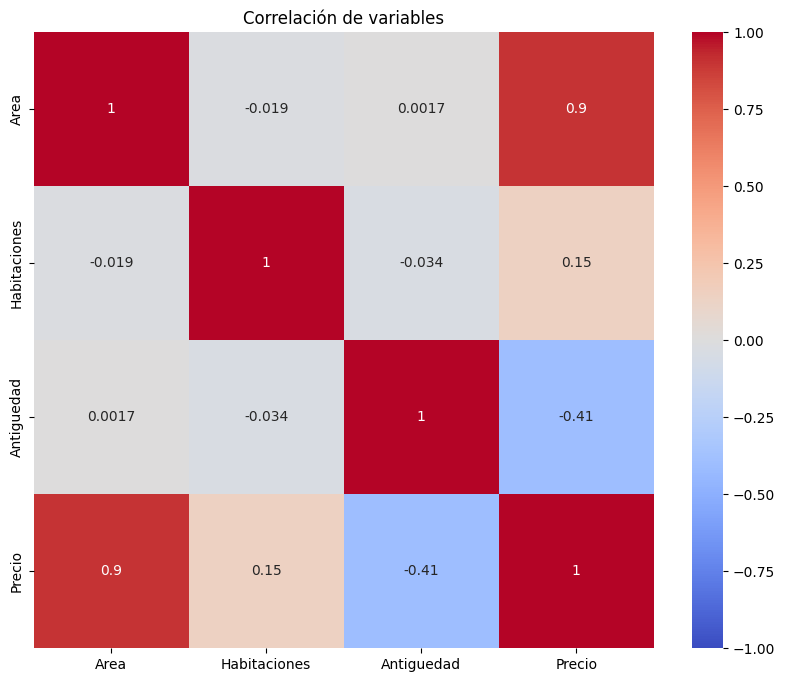

In [6]:
# Calcular la matriz de correlación
corr_matrix = df.drop('Fecha', axis=1).corr()

# Crear el gráfico de correlación tipo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título y mostrar el gráfico
plt.title('Correlación de variables')
plt.show()

In [7]:
# Preprocesamiento
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.day
df.drop('Fecha', axis=1, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Area', 'Habitaciones', 'Antiguedad']])
df_scaled = pd.DataFrame(scaled_data, columns=['Area', 'Habitaciones', 'Antiguedad'])
df[['Area', 'Habitaciones', 'Antiguedad']] = df_scaled

In [8]:
df.head()

,Area,Habitaciones,Antiguedad,Precio,Año,Mes,Dia
0,1.279597,-1.456839,0.591377,425540.007714,2003,8,13
1,-0.701423,-1.456839,-0.181206,221783.700891,2008,8,16
2,0.147586,-0.050624,-1.550784,443427.777911,2017,1,30
3,1.208847,-0.050624,0.169968,469706.327130,2007,9,24
4,-1.739100,-0.753731,0.661611,56313.569319,2010,10,6


In [9]:
media = scaler.mean_
desv_estandar = scaler.scale_
df_scaler = pd.DataFrame({'Media':media, 'STD': desv_estandar})

In [10]:
df.to_excel(os.path.join(PATH, AUX_FOLDER, OUTPUT_FILENAME), index=False)
df_scaler.to_excel(os.path.join(PATH, AUX_FOLDER, 'scaler.xlsx'), index=False)
tiempo_fin = time()
duracion = tiempo_fin - tiempo_inicio
horas, remainder = divmod(int(duracion), 3600)
minutos, segundos = divmod(remainder, 60)
print(f'{today} El tiempo transcurrido de ejecucion fue: {horas:02d}h {minutos:02d}m {segundos:02d}s')

[2023-03-30 16:01:08] El tiempo transcurrido de ejecucion fue: 00h 00m 00s
